RNN 순환신경망
- 순서라는 개념을 확대한 모델 
- ex)노래플레이리스트 예측, 행동분석,주식,음악,번역

SimpleRNN 사용
- hello > o 를 맞추는 모습
- 과거 4개의 char를 이용해서 다음에 등장할 char를 예측하는 모델 만들기
hell0,appl,e, lobb, daddy,bobby,olleh

CNN 입력값 파라미터
- (sample, height, weight, chanel)
- sample: 데이터의 수 
- height: 세로 
- weight: 가로
- chanel : 1(grayscale)
             3(RGB)
             4(RGBA)
                         * A 투명도
RNN 파라미터 
- (sample , timesteps, features)
- sample : 데이터의 수 
- timesteps : 몇단계로 이루어 질것인지
ex)내일 주식가격 예측을 위해서 과거 5일동안의 데이터를 가져옴: 5
나는 오늘 집에 가서 밥을 ___ : 5

- features : 특징의 수
음악: 미 레 도 레 __ 
 음계: features : 1
 음계, 박자 : features : 2


- 다음주 에너지 사용량 맞추기
- 사용되는 데이터는 이전 4주차 에너지 데이터
- 에너지가 사용되는 건물 전체의 에너지 데이터
- 총 20명 학생에게 데이터를 받아옴 

sample : 20
timestep: 4
features : 1

#### 각 char를 원 핫 인코딩으로 수치화 시키다.
- h, e, I, o, a, p, b,y
- 총10개 당ㄴ어
- feature: 10개
- h : [1,0,0,0,0,0,0,0,0,0]
- e : [0,1,0,0,0,0,0,0,0,0]
- l : [0,0,1,0,0,0,0,0,0,0]
- o : [0,0,0,1,0,0,0,0,0,0]
- a : [0,0,0,0,1,0,0,0,0,0]
- p : [0,0,0,0,0,1,0,0,0,0]
- b : [0,0,0,0,0,0,1,0,0,0]
- y : [0,0,0,0,0,0,0,1,0,0]
- u : [1,0,0,0,0,0,0,0,1,0]
- d : [1,0,0,0,0,0,0,0,0,1]

In [1]:
import numpy as np


In [2]:
# hello,apple,daddy,boby,holly,bubbl, olleh
X_train = np.array([
    [[1,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0]],
    [[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0,0,0]],
    [[0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0,0]],
    [[0,0,0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,1]],
    [[0,0,0,0,0,0,1,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0,0]],
    [[1,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0]],
    [[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0,0]],
    [[0,0,0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0]]])


In [3]:
y_train = np.array([
    [0,0,0,1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0]])

In [4]:
X_train.shape, y_train.shape

((8, 4, 10), (8, 10))

#### 모델링

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [6]:
# hello,apple,lobby,daddy,boby,holly,bubbl, olleh
model = Sequential()

# timestpes: 4
# features: 10
# 입력, 은닉(데이터가 많지 않아 굳이 은닉층을 쌓지는 않음)
model.add(SimpleRNN(3 , input_shape=(4,10))) #sample수는 지정하지 않아도 됨 
                                            #4개의 단어와 10개의 원핫인코딩으로 되어있다.

# 출력    
model.add(Dense(10, activation = 'softmax'))# 다중분류

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
_________________________________________________________________
dense (Dense)                (None, 10)                40        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 컴파일
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [9]:
#학습
history1=model.fit(X_train,y_train,epochs=1000,batch_size=50)

Train on 8 samples
Epoch 1/1000
8/8 [==============================] - 1s 160ms/sample - loss: 2.1648 - accuracy: 0.1250
Epoch 2/1000
8/8 [==============================] - 0s 374us/sample - loss: 2.1615 - accuracy: 0.1250
Epoch 3/1000
8/8 [==============================] - 0s 374us/sample - loss: 2.1582 - accuracy: 0.1250
Epoch 4/1000
8/8 [==============================] - 0s 499us/sample - loss: 2.1550 - accuracy: 0.1250
Epoch 5/1000
8/8 [==============================] - 0s 499us/sample - loss: 2.1517 - accuracy: 0.1250
Epoch 6/1000
8/8 [==============================] - 0s 374us/sample - loss: 2.1485 - accuracy: 0.1250
Epoch 7/1000
8/8 [==============================] - 0s 499us/sample - loss: 2.1454 - accuracy: 0.1250
Epoch 8/1000
8/8 [==============================] - 0s 374us/sample - loss: 2.1422 - accuracy: 0.1250
Epoch 9/1000
8/8 [==============================] - 0s 374us/sample - loss: 2.1391 - accuracy: 0.1250
Epoch 10/1000
8/8 [==============================] - 0s 499us/s

Epoch 81/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.9203 - accuracy: 0.3750
Epoch 82/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.9170 - accuracy: 0.3750
Epoch 83/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.9137 - accuracy: 0.3750
Epoch 84/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.9104 - accuracy: 0.3750
Epoch 85/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.9071 - accuracy: 0.3750
Epoch 86/1000
8/8 [==============================] - 0s 623us/sample - loss: 1.9037 - accuracy: 0.3750
Epoch 87/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.9004 - accuracy: 0.3750
Epoch 88/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.8970 - accuracy: 0.3750
Epoch 89/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.8936 - accuracy: 0.3750
Epoch 90/1000
8/8 [==============================] - 0s 499us/sample - lo

Epoch 160/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.6288 - accuracy: 0.5000
Epoch 161/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.6249 - accuracy: 0.5000
Epoch 162/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.6210 - accuracy: 0.6250
Epoch 163/1000
8/8 [==============================] - 0s 249us/sample - loss: 1.6172 - accuracy: 0.6250
Epoch 164/1000
8/8 [==============================] - 0s 249us/sample - loss: 1.6133 - accuracy: 0.6250
Epoch 165/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.6094 - accuracy: 0.6250
Epoch 166/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.6056 - accuracy: 0.6250
Epoch 167/1000
8/8 [==============================] - 0s 249us/sample - loss: 1.6017 - accuracy: 0.6250
Epoch 168/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.5978 - accuracy: 0.6250
Epoch 169/1000
8/8 [==============================] - 0s 374us/s

Epoch 239/1000
8/8 [==============================] - 0s 623us/sample - loss: 1.3443 - accuracy: 0.7500
Epoch 240/1000
8/8 [==============================] - 0s 499us/sample - loss: 1.3411 - accuracy: 0.7500
Epoch 241/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.3380 - accuracy: 0.7500
Epoch 242/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.3348 - accuracy: 0.7500
Epoch 243/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.3316 - accuracy: 0.7500
Epoch 244/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.3285 - accuracy: 0.7500
Epoch 245/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.3254 - accuracy: 0.7500
Epoch 246/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.3223 - accuracy: 0.7500
Epoch 247/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.3191 - accuracy: 0.7500
Epoch 248/1000
8/8 [==============================] - 0s 374us/s

Epoch 318/1000
8/8 [==============================] - 0s 499us/sample - loss: 1.1258 - accuracy: 0.7500
Epoch 319/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.1235 - accuracy: 0.7500
Epoch 320/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.1211 - accuracy: 0.7500
Epoch 321/1000
8/8 [==============================] - 0s 249us/sample - loss: 1.1187 - accuracy: 0.7500
Epoch 322/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.1164 - accuracy: 0.7500
Epoch 323/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.1141 - accuracy: 0.7500
Epoch 324/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.1117 - accuracy: 0.7500
Epoch 325/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.1094 - accuracy: 0.7500
Epoch 326/1000
8/8 [==============================] - 0s 374us/sample - loss: 1.1071 - accuracy: 0.7500
Epoch 327/1000
8/8 [==============================] - 0s 374us/s

Epoch 397/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.9626 - accuracy: 0.8750
Epoch 398/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.9608 - accuracy: 0.8750
Epoch 399/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.9591 - accuracy: 0.8750
Epoch 400/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.9573 - accuracy: 0.8750
Epoch 401/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.9555 - accuracy: 0.8750
Epoch 402/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.9538 - accuracy: 0.8750
Epoch 403/1000
8/8 [==============================] - 0s 624us/sample - loss: 0.9520 - accuracy: 0.8750
Epoch 404/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.9503 - accuracy: 0.8750
Epoch 405/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.9486 - accuracy: 0.8750
Epoch 406/1000
8/8 [==============================] - 0s 374us/s

Epoch 476/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8402 - accuracy: 0.8750
Epoch 477/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8388 - accuracy: 0.8750
Epoch 478/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8375 - accuracy: 0.8750
Epoch 479/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8362 - accuracy: 0.8750
Epoch 480/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8349 - accuracy: 0.8750
Epoch 481/1000
8/8 [==============================] - 0s 499us/sample - loss: 0.8335 - accuracy: 0.8750
Epoch 482/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8322 - accuracy: 0.8750
Epoch 483/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8309 - accuracy: 0.8750
Epoch 484/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.8296 - accuracy: 0.8750
Epoch 485/1000
8/8 [==============================] - 0s 374us/s

Epoch 555/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7464 - accuracy: 0.8750
Epoch 556/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7454 - accuracy: 0.8750
Epoch 557/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7443 - accuracy: 0.8750
Epoch 558/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7433 - accuracy: 0.8750
Epoch 559/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7422 - accuracy: 0.8750
Epoch 560/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7411 - accuracy: 0.8750
Epoch 561/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7401 - accuracy: 0.8750
Epoch 562/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7390 - accuracy: 0.8750
Epoch 563/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.7380 - accuracy: 0.8750
Epoch 564/1000
8/8 [==============================] - 0s 499us/s

Epoch 634/1000
8/8 [==============================] - 0s 499us/sample - loss: 0.6618 - accuracy: 0.8750
Epoch 635/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6606 - accuracy: 0.8750
Epoch 636/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.6595 - accuracy: 0.8750
Epoch 637/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6584 - accuracy: 0.8750
Epoch 638/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6572 - accuracy: 0.8750
Epoch 639/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6561 - accuracy: 0.8750
Epoch 640/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6549 - accuracy: 0.8750
Epoch 641/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6537 - accuracy: 0.8750
Epoch 642/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.6526 - accuracy: 0.8750
Epoch 643/1000
8/8 [==============================] - 0s 374us/s

Epoch 713/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5692 - accuracy: 0.8750
Epoch 714/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5680 - accuracy: 0.8750
Epoch 715/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5669 - accuracy: 0.8750
Epoch 716/1000
8/8 [==============================] - 0s 499us/sample - loss: 0.5657 - accuracy: 0.8750
Epoch 717/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5646 - accuracy: 0.8750
Epoch 718/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5634 - accuracy: 0.8750
Epoch 719/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5623 - accuracy: 0.8750
Epoch 720/1000
8/8 [==============================] - 0s 499us/sample - loss: 0.5611 - accuracy: 0.8750
Epoch 721/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.5599 - accuracy: 0.8750
Epoch 722/1000
8/8 [==============================] - 0s 249us/s

Epoch 792/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.4826 - accuracy: 0.8750
Epoch 793/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4816 - accuracy: 0.8750
Epoch 794/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4806 - accuracy: 0.8750
Epoch 795/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4796 - accuracy: 0.8750
Epoch 796/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4786 - accuracy: 0.8750
Epoch 797/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4776 - accuracy: 0.8750
Epoch 798/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4766 - accuracy: 0.8750
Epoch 799/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4756 - accuracy: 0.8750
Epoch 800/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4746 - accuracy: 0.8750
Epoch 801/1000
8/8 [==============================] - 0s 374us/s

Epoch 871/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4098 - accuracy: 1.0000
Epoch 872/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4089 - accuracy: 1.0000
Epoch 873/1000
8/8 [==============================] - 0s 499us/sample - loss: 0.4081 - accuracy: 1.0000
Epoch 874/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4073 - accuracy: 1.0000
Epoch 875/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4064 - accuracy: 1.0000
Epoch 876/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4056 - accuracy: 1.0000
Epoch 877/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4048 - accuracy: 1.0000
Epoch 878/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4040 - accuracy: 1.0000
Epoch 879/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.4031 - accuracy: 1.0000
Epoch 880/1000
8/8 [==============================] - 0s 374us/s

Epoch 950/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.3498 - accuracy: 1.0000
Epoch 951/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.3491 - accuracy: 1.0000
Epoch 952/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.3485 - accuracy: 1.0000
Epoch 953/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.3478 - accuracy: 1.0000
Epoch 954/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.3471 - accuracy: 1.0000
Epoch 955/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.3464 - accuracy: 1.0000
Epoch 956/1000
8/8 [==============================] - 0s 623us/sample - loss: 0.3458 - accuracy: 1.0000
Epoch 957/1000
8/8 [==============================] - 0s 374us/sample - loss: 0.3451 - accuracy: 1.0000
Epoch 958/1000
8/8 [==============================] - 0s 249us/sample - loss: 0.3444 - accuracy: 1.0000
Epoch 959/1000
8/8 [==============================] - 0s 374us/s

In [10]:
acc= history1.history['accuracy']

[]

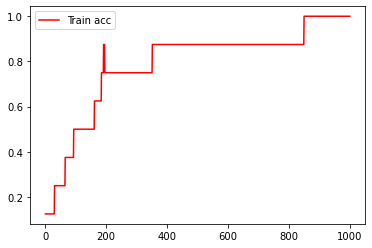

In [11]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']


epoch = range(1,len(acc)+1)

plt.plot(epoch, acc, c = 'red',label = 'Train acc')

plt.legend()
plt.plot()

In [12]:
# 문제 :appl
# 정답 : e > [0,1,0,0,0,0,0,0,0,0] > class : 1
model.predict_classes([[[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0,0,0]]])

array([1], dtype=int64)